<a href="https://colab.research.google.com/github/subhadhana99/Regression/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Required Packages**

In [395]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [396]:
ground_cricket_data = {"ChirpsperSecond": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# **EDA**


In [397]:
df.describe()

,ChirpsperSecond,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


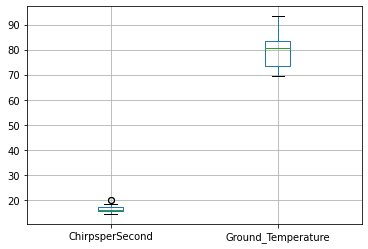

In [398]:
#outlier detection
df.boxplot()

In [399]:
iqr = df.ChirpsperSecond.quantile(0.75) - df.ChirpsperSecond.quantile(0.25)
upper_threshold = df.ChirpsperSecond.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.ChirpsperSecond.quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(12.9, 19.699999999999996)

In [400]:
iqr = df.Ground_Temperature.quantile(0.75) - df.Ground_Temperature.quantile(0.25)
upper_threshold = df.Ground_Temperature.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Ground_Temperature.quantile(0.25) - (1.5 * iqr)
lower_threshold,upper_threshold

(58.400000000000006, 98.4)

since the upperthreshold value is nearby maximum value of chirpspersecond we consider there is no outlier 

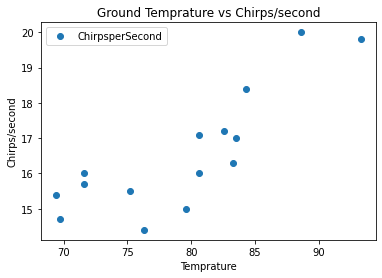

In [401]:
#to check whether there is a linear relation between X and Y
df.plot(x='Ground_Temperature', y='ChirpsperSecond', style='o')
plt.title('Ground Temprature vs Chirps/second')
plt.xlabel('Temprature')
plt.ylabel('Chirps/second')
plt.show()

In [402]:
df.corr()

,ChirpsperSecond,Ground_Temperature
ChirpsperSecond,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


there is a linear relationship between Chrips per second and Ground Temprature.there is no need for transformation.


In [403]:
from sklearn.model_selection import train_test_split 
x = df.loc[:,['Ground_Temperature']].values
y = df.loc[:,'ChirpsperSecond'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=856)

In [404]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.intercept_)#c

-0.6108299955352301


In [405]:
print(reg.coef_) #m


[0.21586441]


In [406]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(reg.coef_[0], reg.intercept_))

Linear Regression Equation: y = 0.2159 * x + -0.6108


the required regression equation is
         y=0.2158*(Ground_Temperature)-0.6108

In [407]:
reg.predict([[95]])

array([19.89628884])

For the ground temperature  95, the approximate rate of crickets to be chirping is 19.89628884

In [408]:
y_pred = reg.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,15.5,15.622174
1,14.7,14.434919
2,15.7,14.845062
3,18.4,17.586540
4,16.3,17.370675


In [409]:
reg.score(x_test,y_test)

0.6639117682836977

since the R^2 is less than 0.8 this model is not the best fit.

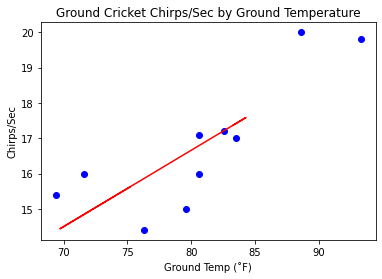

In [410]:
#Chart the original data and the equation on the chart.
plt.scatter(x_train, y_train,color='b') 
plt.plot(x_test, y_pred,color='r') 
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

Because this is below 0.8, this is not a best fit for this data.


In [411]:
def chirps_to_temp(y):
    chirp = (y - reg.intercept_) / reg.coef_[0]
    print('With an observation of {} chirps/sec, '
          'we expect a ground temp of {:.2f}˚F'.format(y,chirp))

In [412]:
chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of 86.22˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [413]:
df2 = pd.read_fwf("brain_body.txt")
df2

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [414]:
df2.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [415]:
df2.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


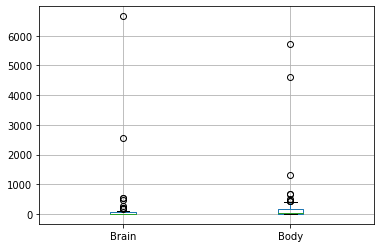

In [416]:
#outlier detection
df2.boxplot()

In [417]:
iqr=df2.Body.quantile(0.75) - df2.Body.quantile(0.25)
upb = df2.Body.quantile(0.75) + (1.5 * iqr)
lwb= df2.Body.quantile(0.25) - (1.5 * iqr)
lwb,upb

(-238.375, 408.625)

In [418]:
iqr=df2.Brain.quantile(0.75) - df2.Brain.quantile(0.25)
upb = df2.Brain.quantile(0.75) + (1.5 * iqr)
lwb= df2.Brain.quantile(0.25) - (1.5 * iqr)
lwb,upb

(-70.80375000000001, 119.60625)

In [419]:
#Treating the Outliers
df2.Body=df2.Body.clip(-238.375, 408.625)

In [420]:
df2.Brain=df2.Brain.clip(-70.80375000000001, 119.60625)

In [421]:
df2.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


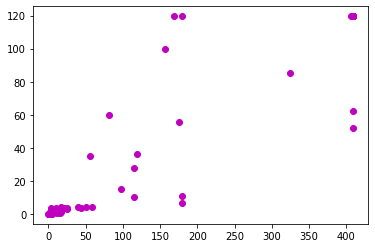

In [422]:
#To Find the linear relations between the target and feature
plt.scatter(df2.Body, df2.Brain, color='m')

In [423]:
df2.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


In [424]:
x = df2.loc[:,['Body']].values
y = df2.loc[:,'Brain'].values

In [425]:
#splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=123)

In [426]:
#Modelling
regr = LinearRegression()
regr.fit(x_train,y_train)
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regr.coef_[0], regr.intercept_))

Linear Regression Equation: y = 0.2724 * x + 0.9992


In [427]:
#Evaluation Metrics
regr.score(x_train,y_train)

0.8010247151523202

In [428]:
y_pred=regr.predict(x_test)

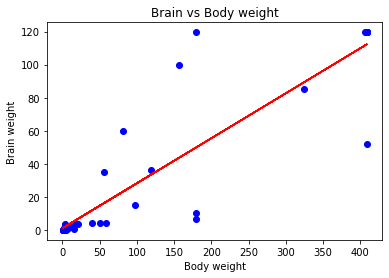

In [429]:
#Chart the original data and the equation on the chart.
plt.scatter(x_train, y_train,color='b') 
plt.plot(x_test, y_pred,color='r') 
plt.title('Brain vs Body weight')
plt.xlabel('Body weight')
plt.ylabel('Brain weight')
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [430]:
df3= pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [431]:
df3.tail()

,Sex,Rank,Year,Degree,YSdeg,Salary
47,1,1,2,1,2,15350
48,0,1,1,1,1,16244
49,1,1,1,1,1,16686
50,1,1,1,1,1,15000
51,1,1,0,1,2,20300


In [432]:
df3.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [433]:
df3.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [434]:
df3 = df3.drop_duplicates()

In [435]:
df3.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


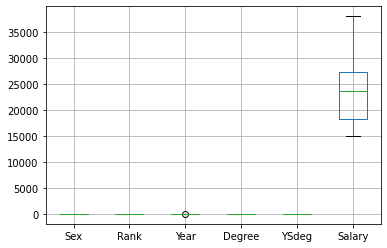

In [436]:
#outlier detection
df3.boxplot()

Finding the linear relationship between Target variable and features

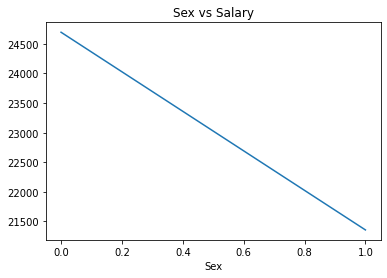

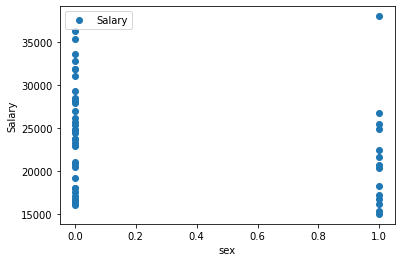

In [437]:
df3.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
df3.plot(x='Sex', y='Salary', style='o')
plt.xlabel('sex')
plt.ylabel('Salary')
plt.show()

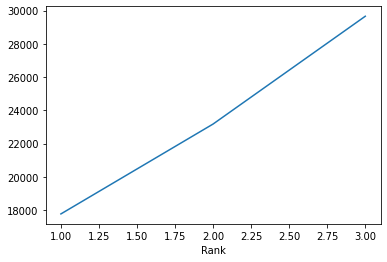

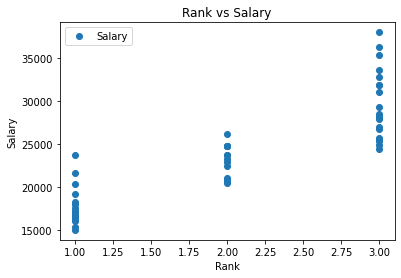

In [438]:
df3.groupby('Rank')['Salary'].mean().plot()
df3.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

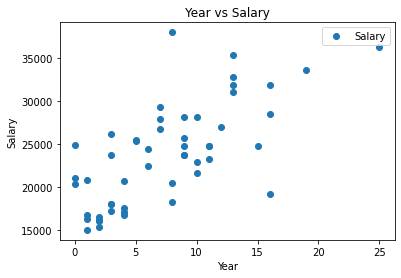

In [439]:
#df3.groupby('Year')['Salary'].mean().plot()
df3.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [440]:
df3.groupby('Degree')['Salary'].mean()

Degree
0    24359.222222
1    23500.352941
Name: Salary, dtype: float64

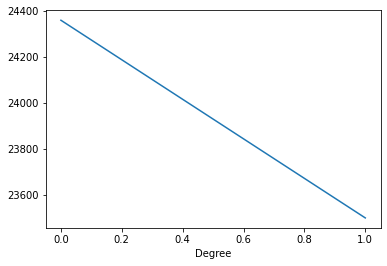

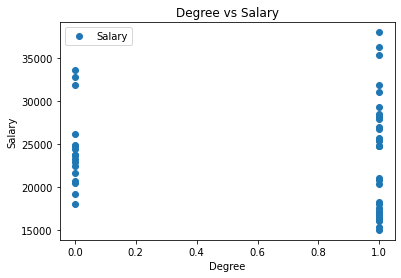

In [441]:
df3.groupby('Degree')['Salary'].mean().plot()
df3.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

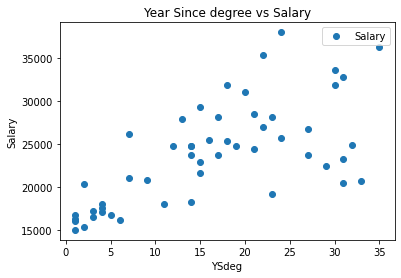

In [442]:
#df3.groupby('YSdeg')['Salary'].mean().plot()
df3.plot(x='YSdeg', y='Salary', style='o')
plt.title('Year Since degree vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [443]:
df3.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


###The sex has very less effect on salary it shows very less correlation with salary so we can conclude that sex of person can not determine their salary.###



1.   From the correlation matrix it is found that only Degree has least coorelation with salary so there is a poor linear relationship between Degree and salary.
2. Let us make transformation on degree check it




/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,trdegree,Salary
trdegree,NaN,NaN
Salary,NaN,1.0


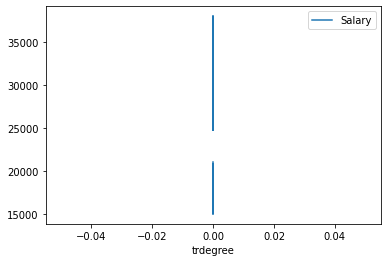

In [444]:
df3['trdegree'] = np.log(df3['Degree'])
df3.plot(x='trdegree', y='Salary')
df3[['trdegree','Salary']].corr()

,trdegree,Salary
trdegree,1.000000,-0.069726
Salary,-0.069726,1.000000


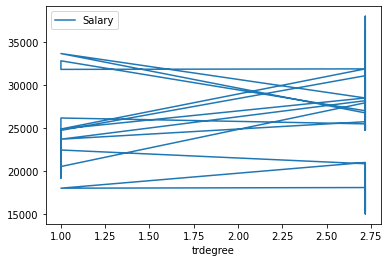

In [445]:
df3['trdegree'] = np.exp(df3['Degree'])
df3.plot(x='trdegree', y='Salary')
df3[['trdegree','Salary']].corr()

,trdegree,Salary
trdegree,1.000000,-0.069726
Salary,-0.069726,1.000000


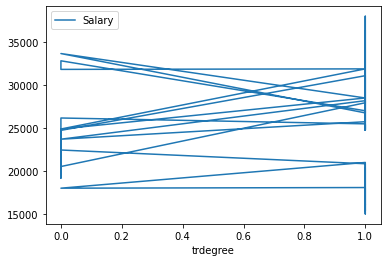

In [446]:
df3['trdegree'] = np.sqrt(df3['Degree'])
df3.plot(x='trdegree', y='Salary')
df3[['trdegree','Salary']].corr()

None of the transformation Works for degree data set so we proceed further

# **Modelling**

In [447]:
#array of features
x = df3[['Sex', 'Rank', 'Year','Degree','YSdeg']].values 
#array of target
y = df3['Salary'].values 

In [448]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=100)

In [449]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# Now we are finding the values of mean and sd from the td
scaler.fit(x_train) 
#fit (mean, sd) and then transform the training data
x_train_scaled = scaler.transform(x_train) 
# transform the test data 
x_test_scaled = scaler.transform(x_test) 

# Model training

In [450]:
regrs=LinearRegression()
regrs.fit(x_train_scaled, y_train)

LinearRegression()

In [451]:
# coefficients of the model
coefs= pd.DataFrame(regrs.coef_,['Sex', 'Rank', 'Year','Degree','YSdeg'],columns=['Coefficient'])
coefs

,Coefficient
Sex,437.503914
Rank,4895.499934
Year,2350.275048
Degree,-604.626702
YSdeg,-1110.215301


In [452]:
y_pred = regrs.predict(x_test_scaled)
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

,Actual,Predicted
0,24900,25121.787886
1,23713,19721.143791
2,16700,16902.641956
3,20850,20483.947720
4,20690,21475.671553
5,20300,16135.458971
6,28516,32430.895501
7,24800,25066.945099
8,25400,27098.981547
9,16094,16334.782685


Evaluation ,Metrics  R\^2



In [453]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8061108459174359
